# MA124 Maths by Computer: Assignment 4
## Machine Learning Applied to Bike Sharing Demand Data

Student number: 2103654

## Introduction ##
In a recent research article published in the journal Computer Communications, authors Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to predict the "bike count required at each hour for the stable supply of rental bikes"[1]. They employed several regression models, including linear regression. The dataset used in the original study is available [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

### Motivation
Rental bikes have been introduced in many urban cities for the enhancement of mobility comfort. Accessibility to rental bikes lessens the public's waiting time but availability is another question. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. Hence, the crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The paper used machine learning and data mining based algorithms to predict required number of rental bikes required at each hour.
Data used include weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 
 
 
[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

________

### Set Up
First import some libraries that will be needed for the computations the Python code will need to make.

In [1]:
# 1 import libraries, including pandas, seaborn and alias to sns, sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

In [2]:
# 2 read the seoulbikedata.csv file to dataframe bike
bike = pd.read_csv("SeoulBikeData_mod.csv") 

In [3]:
#3 describing the data
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


We use pandas and read SeoulBikeData_mod.csv into a dataframe, called 'bike'. Then, using the describe function, we produce the above table that is an overall overview/description of the data.

____

### Various plots of the data

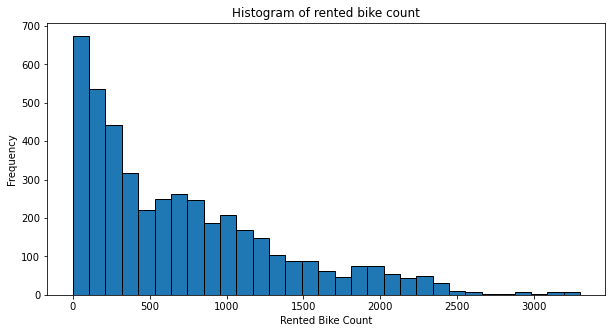

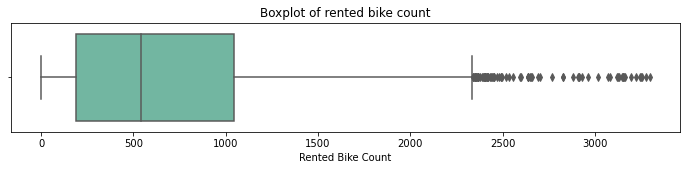

In [4]:
# 4 plotting rented bike count as a histogram
y = bike['Rented Bike Count']

fig = plt.figure(figsize=(10,5))

plt.hist(y, bins=31,edgecolor='black')
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.title("Histogram of rented bike count")
plt.show()

# plotting rented bike count as a boxplot
fig = plt.figure(figsize=(12,2))
sns.boxplot(x=y, palette="Set2")
plt.xlabel("Rented Bike Count")
plt.title("Boxplot of rented bike count")
plt.show()

Above is a histogram showing the frequency of rented bike count at each hour. 

Below the histogram is a boxplot. The median is indicated by the line in the middle of the green box, which takes a value of roughly less than 600 bikes being rented per hour. 

Notice that there is a long tail in the data distribution. The value of the lower whisker is 0 and the upper whisker is around 2300. There are also more dispersed data above the median value. And, there are many outliers displayed above the upper whisker that are marked with diamonds.

____
Now plot violin plots to show the bike count for different months and the other showing the bike count for different hours.

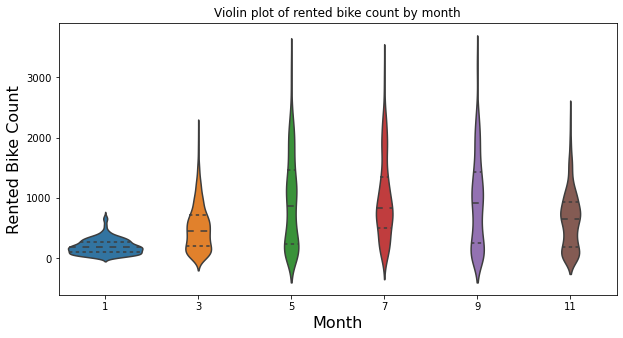

In [5]:
# 5a violin plots for Rented Bike Count against month
month = bike['Month']

fig = plt.figure(figsize=(10,5))
sns.violinplot(x=month,y=y,data=bike, inner='quartile')

plt.title('Violin plot of rented bike count by month') 
plt.xlabel('Month', fontsize=16)
plt.ylabel('Rented Bike Count', fontsize=16)

plt.show()

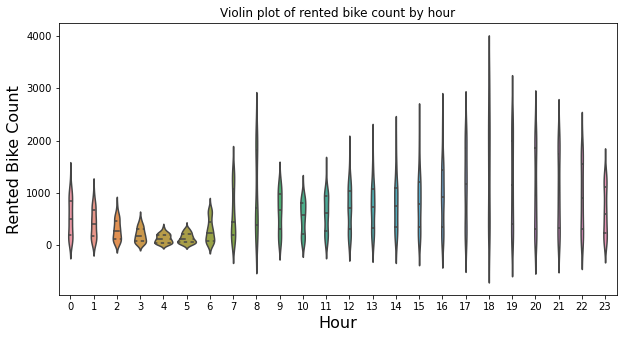

In [6]:
# 5b violin plots for Rented Bike Count against hour
hour = bike['Hour']

fig = plt.figure(figsize=(10,5))
sns.violinplot(x=hour,y=y,data=bike, inner='quartile')

plt.title('Violin plot of rented bike count by hour') 
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Rented Bike Count', fontsize=16)

plt.show()

### Comments
Notice in the first violin plot that the density of the data is much higher in January compared to the other months. The data is most spread during months 5,7,9: May, July, September. This might correspond to the summer time where there are greater flucuations in the number of bike renters as more people use the service for leisure over summer break.

From the second violin plot we can see the density of the data is highest from 4 a.m to 5 a.m . This likely corresponds to night shift workers, who make regular trips so the data is less spread during this time period.

_____
### Linear Regression
From bike, we create a new dataframe 'X' containing all the columns except Rented Bike Count and a Series 'y' containing only the Rented Bike Count column. These will be our design matrix and target respectively for our linear regression model.

We perform a test-train split to create X_train, X_test, y_train and y_test.

This means the rental bike data gets split into two: the training set for building the regression and testing set for assessing the model performance. __75%__ of the final data is used for __training__ the model and the remaining __25%__ is used for __testing__. These are the same proportions used in the research article.

In [7]:
# 6 Create new dataframe X, define design matrix (X) and target (y)
X = bike.drop(['Rented Bike Count'], axis=1)
y = bike['Rented Bike Count']

# 7 Create a train-test split with a test size of 25% of the total samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

Now create and train a linear regression model. Then find y_pred which is the prediction on the test data. Then form the residual.

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# 8 Train the model using the train data
regr.fit(X_train, y_train)

# 9 Using the trained model to obtain y_pred, the prediction on the test data X_test
y_pred = regr.predict(X_test)

#form residual
resid = y_test - y_pred

___
#### Calculating Performance Measures
We find the following values: 
- root mean squared error (RMSE)
- mean absolute error (MAE)
- $R^2$
- coefficient of variance (CV)

In [9]:
# 10 computing R^2, Root Mean Squared Error, mean absolute error, coefficient of variance
r2 = r2_score(y_test, y_pred)
print("The value of R^2 is", r2)

RMSE = np.sqrt(np.mean(resid**2))
print("The root mean squared error is", RMSE)

MAE = np.mean(np.abs(resid))
print("The mean absolute error is", MAE)

CV = 100 * RMSE/np.mean(y_test)
print("The coefficient of variance is", round(CV),"%")

The value of R^2 is 0.47444481227779445
The root mean squared error is 467.19020571949903
The mean absolute error is 341.07160783928026
The coefficient of variance is 64 %


### Comments
Comparing the values for $R^2$, RMSE, MAE and CV to those in table 4 of the article:

The article value for $R^2$ was 0.55, compared to 0.47 (2 d.p.) in the linear regression model. The article value is higher than my value of $R^2$. The higher the $R^2$, the better the prediction as when $R^2$=1, this corresponds to perfect predictions, ie. y_pred = y_test. Neither are very good predictions since neither $R^2$ value is greater than 0.9. However, the article makes a better prediction than the linear regression model.

The article value for RMSE was 427.71, my value was 467.19 (2 d.p.). A smaller value of RMSE is better hence the article makes a better prediction.

The article value for MAE was 322.32, my value was 341.07 (2 d.p.). A smaller value of MAE is better hence the article makes a better prediction.

The article value for CV 61.03%, my value was 64%. A smaller value of CV is better hence the article makes a better prediction.

Smaller values for RMSE, MAE and CV are better since smaller errors correspond to smaller differences between y_pred and y_test, and hence better predictions.

____

#### Now we produce the following plots:

- Histograms of `y_test` and of `y_pred`, as counts rather than densities.

- A scatter plot of `resid` as a function of `y_test` corresponding to Fig. 9 of the article, plotting the different `Hours` in different colours. 

- A scatter plot of `resid` as a function of `X_test['Month']`. We use a colormap to indicate the absolute value of `resid`.

- A scatter plot of `resid` as a function of `X_test['Rainfall(mm)']`. We use a colormap to indicate the absolute value of `resid`.


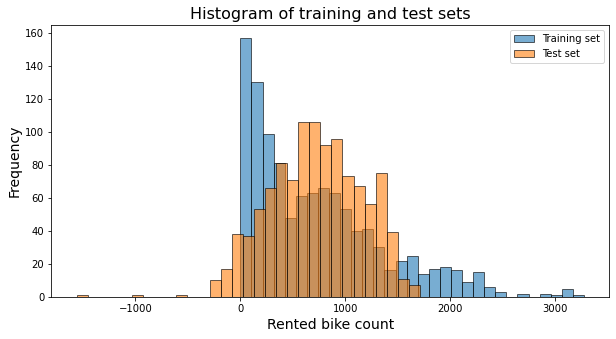

In [10]:
# 11 plotting histogram of y_test (test set) and y_pred (training set)
fig = plt.figure(figsize=(10,5))

plt.hist(y_test, bins=31, edgecolor='black', label="Training set", alpha=0.6)
plt.hist(y_pred, bins=31, edgecolor='black', label="Test set", alpha=0.6)
plt.xlabel("Rented bike count", fontsize="14")
plt.ylabel("Frequency", fontsize="14")
plt.title("Histogram of training and test sets", fontsize="16")
plt.legend()
plt.show()

The test set makes a good prediction for rented bike counts from 500 to just over 1000. At extremities, the model is less accurate and doesn't make sense when rented bike count is negative.

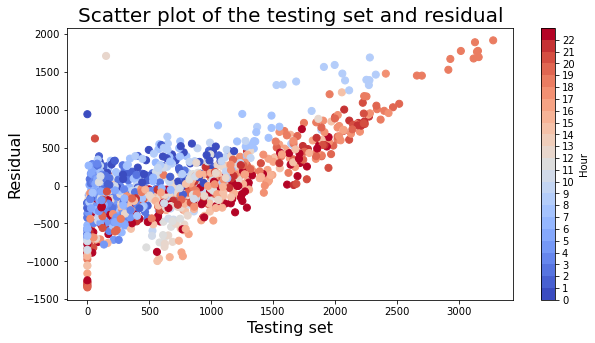

In [11]:
# A scatter plot of resid as a function of y_test
t=X_test['Hour']

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, resid,c=t,s=50, cmap=plt.cm.get_cmap('coolwarm',23))
plt.colorbar(ticks=range(23), label='Hour')
plt.title('Scatter plot of the testing set and residual', fontsize=20)
plt.xlabel('Testing set', fontsize=16)
plt.ylabel('Residual', fontsize=16)

plt.show()

The residual is the difference between exact and approximate values. The model is quite successful for hours 0-6 shown by the concentration of darker blue dots with smaller residual value. The model loses accuracy for hours around 15 as these have the greatest residual value- perhaps this is peak bike renting period and so the data flucuates a lot making it difficult for the machine to make accurate predictions since the data points it's learning from vary vastly.

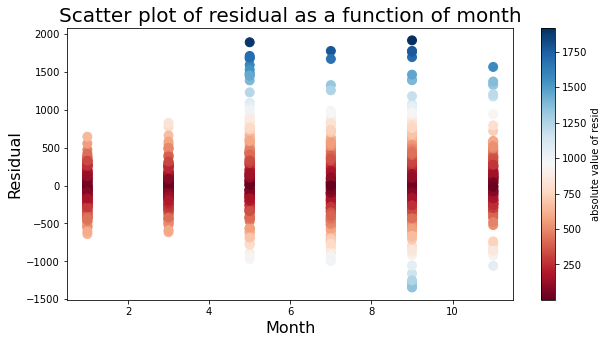

In [12]:
# A scatter plot of resid as a function of X_test['Month']
t=np.abs(resid)

fig = plt.figure(figsize=(10,5))
plt.scatter(X_test['Month'], resid,c=t,s=80, cmap='RdBu')
plt.colorbar(label='absolute value of resid')
plt.title('Scatter plot of residual as a function of month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Residual', fontsize=16)

plt.show()

The model makes the best predictions for month 1, January, as all dots for month 1 have absolute residual value under 1000.  
The model is worst at making predictions for months 5,7,9 (May, July, September) since these months have dots with absolute residual value spanning from 0 to upwards of 1750. 

This could be because during the summer months, there is greater variance i.e. less constitency in the number of bikes being rented out hence making it more difficult for the model to make accurate predictions.

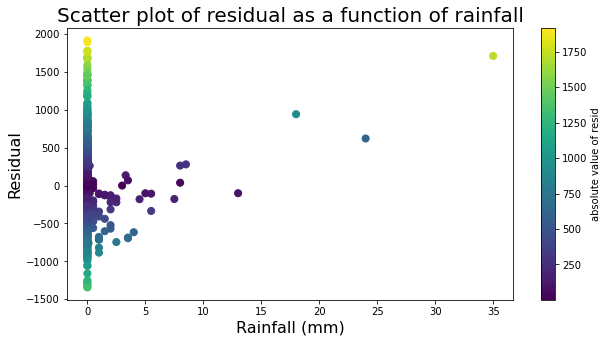

In [13]:
# A scatter plot of resid as a function of X_test['Rainfall(mm)']
t=np.abs(resid)

fig = plt.figure(figsize=(10,5))
plt.scatter(X_test['Rainfall(mm)'], resid,c=t,s=50, cmap='viridis')
plt.colorbar(label='absolute value of resid')
plt.title('Scatter plot of residual as a function of rainfall', fontsize=20)
plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Residual', fontsize=16)

plt.show()

See that most data points occur at rainfall=0mm. There is still a large range of residual values here perhaps due to other factors having a bigger impact than just rainfall on the number of bikes being rented out.

For rainfall not equal to 0mm
Fewer people are likely to rent bikes in the rain, so the model won't be very accurate when predicting the number of bikes needed to rent when it rains since the model didn't have many data points to learn from - see the last 3 points which have absolute residual value of around 500.

___
#### Decision tree regression model (challenge)
We create and train a DecisionTreeRegressor with max_depth=8. Then
from earlier, use the train model to obtain y_pred and compute the residual: call it resid_tree.

In [14]:
# Create Decision Tree Regressor object
regr_tree = DecisionTreeRegressor(max_depth=8)

# train the model using the train data
regr_tree.fit(X_train, y_train)

# predict the test data
y_pred_tree = regr_tree.predict(X_test)

# form residual
resid_tree = y_test - y_pred_tree

___
#### Calculating Performance Measures
We find the following values: 
- root mean squared error (RMSE)
- mean absolute error (MAE)
- $R^2$
- coefficient of variance (CV)

In [15]:
# computing R^2, Root Mean Squared Error, mean absolute error, coefficient of variance
r2_tree = r2_score(y_test, y_pred_tree)
print("The value of R^2 is", r2_tree)

RMSE_tree = np.sqrt(np.mean(resid_tree**2))
print("The root mean squared error is", RMSE_tree)

MAE_tree = np.mean(np.abs(resid_tree))
print("The mean absolute error is", MAE_tree)

CV_tree = 100 * RMSE/np.mean(y_test)
print("The coefficient of variance is", round(CV_tree),"%")

The value of R^2 is 0.6801020946277899
The root mean squared error is 364.4938996043286
The mean absolute error is 225.36740542234674
The coefficient of variance is 64 %


Compared to the linear regression model, the value for $R^2$ found with the decision tree regression model is higher (0.68 to 2d.p.) compared to 0.47. Hence, the decision tree regression model makes a better prediction.

RMSE is smaller too, 364.49 (2d.p.) with decision tree regression model vs 467.19 with linear regression and 427.71 (article). 

MAE here is 225.37 (2d.p.) compared to 341.07 with linear regression.

The decision tree value for RMSE and MAE is smaller than both the article and linear regression values- this translates to a better prediction in both cases.

Also, CV here is 64%, larger than 61.03%  (article) but equal to the linear regression case. This makes for a worse prediction compared to the article but on par with the linear regression model since a higher CV translates into greater differences between y_pred_tree and y_test i.e. worse predictions as a result.

#### Histograms
Plotting two histograms on the same plot: one showing the training set and the other for the testing set using the decision tree regression model.

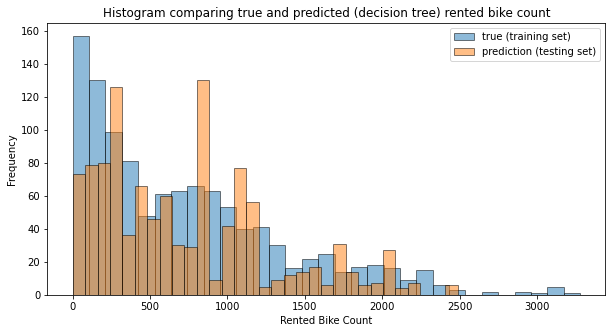

In [16]:
# histograms of y_test and y_pred_tree
fig = plt.figure(figsize=(10,5))

plt.hist(y_test, bins=31, edgecolor='black', alpha=0.5, label="true (training set)")
plt.hist(y_pred_tree, bins=31, edgecolor='black', alpha=0.5, label="prediction (testing set)")

plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.title("Histogram comparing true and predicted (decision tree) rented bike count")
plt.legend()
plt.show()

___
#### Conclusion and final remarks
The decision tree regression model seems to be a better model for approximating the rented bike count compared to the linear regression model as seen by the performance measure comparison above.

Additionally, the closeness of the histogram to the true data is better with the decision tree regression model than the linear regression model.

Neither model is perfect and both have their strengths and weaknesses. Regardless, we can see the potential of machine learning to make predictions. These can help governments or firms make more well-informed decisions when deciding how many bikes they will need to supply to meet demand given different factors.